In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Configure MPL parameters (taken from https://github.com/jbmouret/matplotlib_for_papers)
golden_ratio = (5**.5 - 1) / 2
params = {
    'figure.figsize': [5, 5*golden_ratio],
    "text.usetex": True,
    "font.family": "serif",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
mpl.rcParams.update(params)

%matplotlib inline

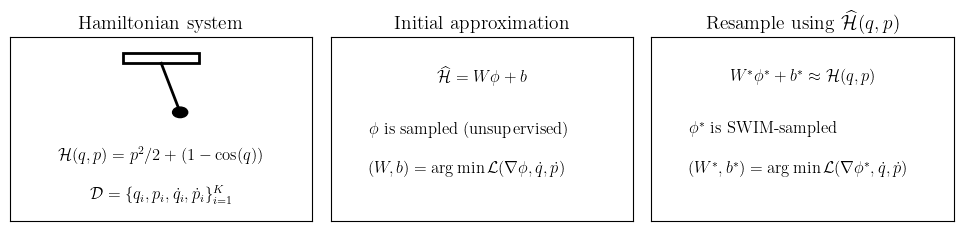

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(10,4*golden_ratio), dpi=100)

# draw pendulum
L = 0.5  
angle = np.pi / 6
pivot = [0, 1.5]
pendulum_end = [L * np.sin(angle), 1 - L * np.cos(angle)]
ax1.add_patch(plt.Rectangle((-0.5, 1.5), 1, 0.2, fill=False, color="k", lw=2))
ax1.plot([pivot[0], pendulum_end[0]], [pivot[1], pendulum_end[1]], "k", lw=2)
ax1.add_patch(plt.Circle((pendulum_end[0], pendulum_end[1]), 0.1, color="k"))

ax1.text(0, -0.25, r"$\mathcal{H}(q, p) = p^2 / 2 + (1 - \cos(q))$", ha="center", va="center")
ax1.text(0, -1,   r"$\mathcal{D}=\{q_i, p_i, \dot{q}_i, \dot{p}_i\}_{i=1}^{K}$", ha="center", va="center")

ax1.set_xlim(-2, 2)
ax1.set_ylim(-1.5, 2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Hamiltonian system")

# Initial approximation (ELM or U-SWIM)
ax2.text(0, 1.25, r"$\widehat{\mathcal{H}} = W \phi + b$", ha="center", va="center")
ax2.text(-1.5, 0.25,   r"$\phi$ is sampled (unsupervised)", ha="left", va="center")
ax2.text(-1.5, -0.5,   r"$(W,b) = \arg\min \mathcal{L}(\nabla \phi, \dot{q}, \dot{p})$", ha="left", va="center")

ax2.set_xlim(-2, 2)
ax2.set_ylim(-1.5, 2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Initial approximation")

# Resample using the initial approximation
ax3.text(0, 1.25, r"$W^{*} \phi^{*} + b^{*} \approx \mathcal{H}(q,p)$", ha="center", va="center")
ax3.text(-1.5, 0.25, r"$\phi^{*}$ is SWIM-sampled", ha="left", va="center")
ax3.text(-1.5, -0.5, r"$(W^{*}, b^{*}) = \arg\min \mathcal{L}(\nabla \phi^{*}, \dot{q}, \dot{p})$", ha="left", va="center")

ax3.set_xlim(-2, 2)
ax3.set_ylim(-1.5, 2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title(r"Resample using $\widehat{\mathcal{H}}(q,p)$")

fig.tight_layout()
fig.savefig("plots/approx-swim-idea.pdf")

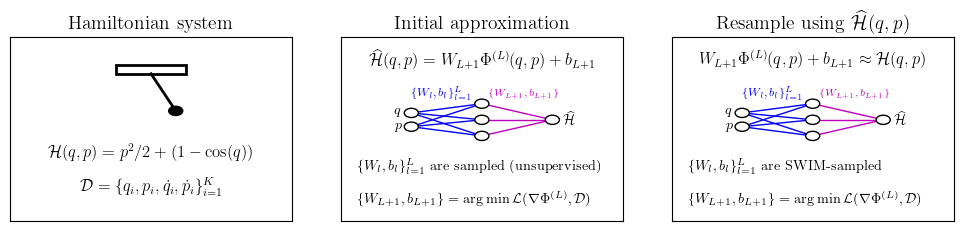

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# draw neural network 
def draw_neural_network(ax, start=(-1.0, 0.2)):
    start_x, start_y = start
    
    # input nodes
    ax.add_patch(plt.Circle((start_x, start_y+0.15), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x, start_y-0.15), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x-0.25, start_y+0.125, r"$q$", fontsize="small")
    ax.text(start_x-0.25, start_y-0.2, r"$p$", fontsize="small")

    # hidden nodes
    ax.add_patch(plt.Circle((start_x+1.0, start_y-0.35), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+1.0, start_y+0.35), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+1.0, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))

    # edges to hidden nodes
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+0.15, start_y-0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+0.15, start_y+0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+0.15, start_y], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-0.15, start_y-0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-0.15, start_y+0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-0.15, start_y], c="b", linewidth=1))
    ax.text(start_x, start_y+0.5, r"$\{W_{l},b_{l}\}_{l=1}^{L}$", fontsize="x-small", c="blue")

    # output node
    ax.add_patch(plt.Circle((start_x+2.0, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x+2.15, start_y-0.1, r"$\widehat{\mathcal{H}}$", fontsize="small")

    # edges to output node
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y-0.35, start_y], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y+0.35, start_y], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y, start_y], c="m", linewidth=1))
    ax.text(start_x+1.1, start_y+0.5, r"$\{W_{L+1}, b_{L+1}\}$", fontsize="xx-small", c="m")

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(10,4*golden_ratio), dpi=100)

# draw pendulum
L = 0.7  
angle = np.pi / 6
pivot = [0, 1.2]
pendulum_end = [L * np.sin(angle), 1 - L * np.cos(angle)]
ax1.add_patch(plt.Rectangle((-0.5, 1.2), 1, 0.2, fill=False, color="k", lw=2))
ax1.plot([pivot[0], pendulum_end[0]], [pivot[1], pendulum_end[1]], "k", lw=2)
ax1.add_patch(plt.Circle((pendulum_end[0], pendulum_end[1]), 0.1, color="k"))
ax1.text(0, -0.5, r"$\mathcal{H}(q, p) = p^2 / 2 + (1 - \cos(q))$", ha="center", va="center")
ax1.text(0, -1.25,   r"$\mathcal{D}=\{q_i, p_i, \dot{q}_i, \dot{p}_i\}_{i=1}^{K}$", ha="center", va="center")
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Hamiltonian system")

# initial approximation (ELM or U-SWIM)
ax2.text(0, 1.5, r"$\widehat{\mathcal{H}}(q,p) = W_{L+1} \Phi^{(L)}(q,p) + b_{L+1}$", ha="center", va="center")
draw_neural_network(ax2)          
ax2.text(-1.75, -0.8,   r"$\{W_l, b_l\}_{l=1}^{L}$ are sampled (unsupervised)", ha="left", va="center", fontsize="small")
ax2.text(-1.75, -1.5,   r"$\{W_{L+1},b_{L+1}\} = \arg\min \mathcal{L}(\nabla \Phi^{(L)}, \mathcal{D})$", ha="left", va="center", fontsize="small")
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Initial approximation")

# Resample using the initial approximation
ax3.text(0, 1.5, r"$W_{L+1} \Phi^{(L)}(q,p) + b_{L+1} \approx \mathcal{H}(q,p)$", ha="center", va="center")
draw_neural_network(ax3)
ax3.text(-1.75, -0.8, r"$\{W_l, b_l\}_{l=1}^{L}$ are SWIM-sampled", ha="left", va="center", fontsize="small")
ax3.text(-1.75, -1.5, r"$\{W_{L+1}, b_{L+1}\} = \arg\min \mathcal{L}(\nabla \Phi^{(L)}, \mathcal{D})   $", ha="left", va="center", fontsize="small")

ax3.set_xlim(-2, 2)
ax3.set_ylim(-2, 2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title(r"Resample using $\widehat{\mathcal{H}}(q,p)$")

fig.tight_layout()
fig.savefig("plots/approx-swim-idea-with-nn.pdf")

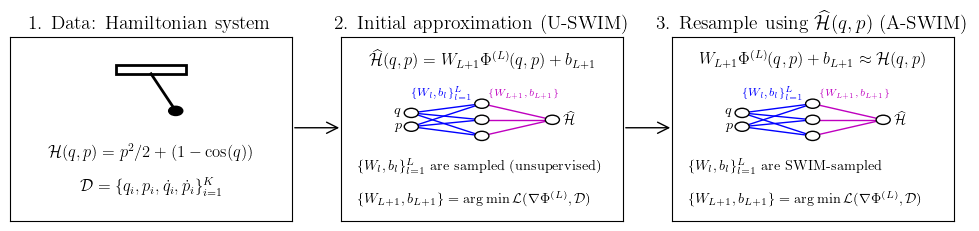

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np

# draw neural network 
def draw_neural_network(ax, start=(-1.0, 0.2)):
    start_x, start_y = start
    
    # input nodes
    ax.add_patch(plt.Circle((start_x, start_y+0.15), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x, start_y-0.15), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x-0.25, start_y+0.125, r"$q$", fontsize="small")
    ax.text(start_x-0.25, start_y-0.2, r"$p$", fontsize="small")

    # hidden nodes
    ax.add_patch(plt.Circle((start_x+1.0, start_y-0.35), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+1.0, start_y+0.35), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+1.0, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))

    # edges to hidden nodes
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+0.15, start_y-0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+0.15, start_y+0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+0.15, start_y], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-0.15, start_y-0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-0.15, start_y+0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-0.15, start_y], c="b", linewidth=1))
    ax.text(start_x, start_y+0.5, r"$\{W_{l},b_{l}\}_{l=1}^{L}$", fontsize="x-small", c="blue")

    # output node
    ax.add_patch(plt.Circle((start_x+2.0, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x+2.15, start_y-0.1, r"$\widehat{\mathcal{H}}$", fontsize="small")

    # edges to output node
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y-0.35, start_y], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y+0.35, start_y], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y, start_y], c="m", linewidth=1))
    ax.text(start_x+1.1, start_y+0.5, r"$\{W_{L+1}, b_{L+1}\}$", fontsize="xx-small", c="m")

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(10,4*golden_ratio), dpi=100)

# draw pendulum
L = 0.7  
angle = np.pi / 6
pivot = [0, 1.2]
pendulum_end = [L * np.sin(angle), 1 - L * np.cos(angle)]
ax1.add_patch(plt.Rectangle((-0.5, 1.2), 1, 0.2, fill=False, color="k", lw=2))
ax1.plot([pivot[0], pendulum_end[0]], [pivot[1], pendulum_end[1]], "k", lw=2)
ax1.add_patch(plt.Circle((pendulum_end[0], pendulum_end[1]), 0.1, color="k"))
ax1.text(0, -0.5, r"$\mathcal{H}(q, p) = p^2 / 2 + (1 - \cos(q))$", ha="center", va="center")
ax1.text(0, -1.25,   r"$\mathcal{D}=\{q_i, p_i, \dot{q}_i, \dot{p}_i\}_{i=1}^{K}$", ha="center", va="center")
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("1. Data: Hamiltonian system")

# initial approximation (ELM or U-SWIM)
ax2.text(0, 1.5, r"$\widehat{\mathcal{H}}(q,p) = W_{L+1} \Phi^{(L)}(q,p) + b_{L+1}$", ha="center", va="center")
draw_neural_network(ax2)          
ax2.text(-1.75, -0.8,   r"$\{W_l, b_l\}_{l=1}^{L}$ are sampled (unsupervised)", ha="left", va="center", fontsize="small")
ax2.text(-1.75, -1.5,   r"$\{W_{L+1},b_{L+1}\} = \arg\min \mathcal{L}(\nabla \Phi^{(L)}, \mathcal{D})$", ha="left", va="center", fontsize="small")
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("2. Initial approximation (U-SWIM)")

# Resample using the initial approximation
ax3.text(0, 1.5, r"$W_{L+1} \Phi^{(L)}(q,p) + b_{L+1} \approx \mathcal{H}(q,p)$", ha="center", va="center")
draw_neural_network(ax3)
ax3.text(-1.75, -0.8, r"$\{W_l, b_l\}_{l=1}^{L}$ are SWIM-sampled", ha="left", va="center", fontsize="small")
ax3.text(-1.75, -1.5, r"$\{W_{L+1}, b_{L+1}\} = \arg\min \mathcal{L}(\nabla \Phi^{(L)}, \mathcal{D})   $", ha="left", va="center", fontsize="small")

ax3.set_xlim(-2, 2)
ax3.set_ylim(-2, 2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title(r"3. Resample using $\widehat{\mathcal{H}}(q,p)$ (A-SWIM)")

# plot arrows
arrow_1 = FancyArrowPatch((0.3, 0.45), (0.35, 0.45), transform=fig.transFigure,
                          arrowstyle='->', mutation_scale=20, color='black')
arrow_2 = FancyArrowPatch((0.631, 0.45), (0.681, 0.45), transform=fig.transFigure,
                          arrowstyle='->', mutation_scale=20, color='black')

fig.add_artist(arrow_1)
fig.add_artist(arrow_2)

fig.tight_layout()
fig.savefig("plots/approx-swim-idea-with-nn-and-arrows.pdf")

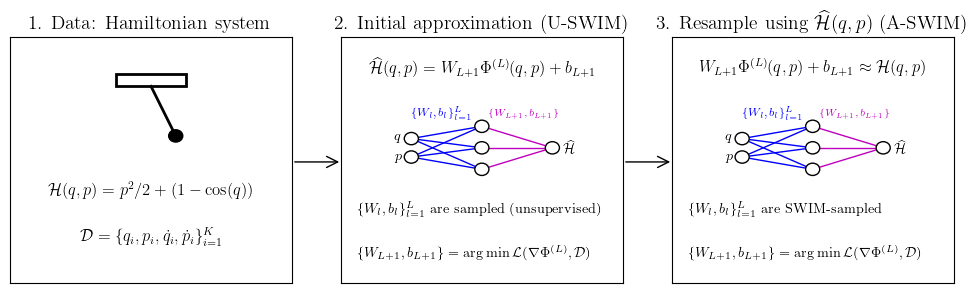

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np

# draw neural network 
def draw_neural_network(ax, start=(-1.0, 0.2)):
    start_x, start_y = start
    
    # input nodes
    ax.add_patch(plt.Circle((start_x, start_y+0.15), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x, start_y-0.15), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x-0.25, start_y+0.125, r"$q$", fontsize="small")
    ax.text(start_x-0.25, start_y-0.2, r"$p$", fontsize="small")

    # hidden nodes
    ax.add_patch(plt.Circle((start_x+1.0, start_y-0.35), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+1.0, start_y+0.35), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+1.0, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))

    # edges to hidden nodes
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+0.15, start_y-0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+0.15, start_y+0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+0.15, start_y], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-0.15, start_y-0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-0.15, start_y+0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-0.15, start_y], c="b", linewidth=1))
    ax.text(start_x, start_y+0.5, r"$\{W_{l},b_{l}\}_{l=1}^{L}$", fontsize="x-small", c="blue")

    # output node
    ax.add_patch(plt.Circle((start_x+2.0, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x+2.15, start_y-0.1, r"$\widehat{\mathcal{H}}$", fontsize="small")

    # edges to output node
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y-0.35, start_y], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y+0.35, start_y], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y, start_y], c="m", linewidth=1))
    ax.text(start_x+1.1, start_y+0.5, r"$\{W_{L+1}, b_{L+1}\}$", fontsize="xx-small", c="m")

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(10,5.*golden_ratio), dpi=100)

# draw pendulum
L = 0.7  
angle = np.pi / 6
pivot = [0, 1.2]
pendulum_end = [L * np.sin(angle), 1 - L * np.cos(angle)]
ax1.add_patch(plt.Rectangle((-0.5, 1.2), 1, 0.2, fill=False, color="k", lw=2))
ax1.plot([pivot[0], pendulum_end[0]], [pivot[1], pendulum_end[1]], "k", lw=2)
ax1.add_patch(plt.Circle((pendulum_end[0], pendulum_end[1]), 0.1, color="k"))
ax1.text(0, -0.5, r"$\mathcal{H}(q, p) = p^2 / 2 + (1 - \cos(q))$", ha="center", va="center")
ax1.text(0, -1.25,   r"$\mathcal{D}=\{q_i, p_i, \dot{q}_i, \dot{p}_i\}_{i=1}^{K}$", ha="center", va="center")
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("1. Data: Hamiltonian system")

# initial approximation (ELM or U-SWIM)
ax2.text(0, 1.5, r"$\widehat{\mathcal{H}}(q,p) = W_{L+1} \Phi^{(L)}(q,p) + b_{L+1}$", ha="center", va="center")
draw_neural_network(ax2)          
ax2.text(-1.75, -0.8,   r"$\{W_l, b_l\}_{l=1}^{L}$ are sampled (unsupervised)", ha="left", va="center", fontsize="small")
ax2.text(-1.75, -1.5,   r"$\{W_{L+1},b_{L+1}\} = \arg\min \mathcal{L}(\nabla \Phi^{(L)}, \mathcal{D})$", ha="left", va="center", fontsize="small")
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("2. Initial approximation (U-SWIM)")

# Resample using the initial approximation
ax3.text(0, 1.5, r"$W_{L+1} \Phi^{(L)}(q,p) + b_{L+1} \approx \mathcal{H}(q,p)$", ha="center", va="center")
draw_neural_network(ax3)
ax3.text(-1.75, -0.8, r"$\{W_l, b_l\}_{l=1}^{L}$ are SWIM-sampled", ha="left", va="center", fontsize="small")
ax3.text(-1.75, -1.5, r"$\{W_{L+1}, b_{L+1}\} = \arg\min \mathcal{L}(\nabla \Phi^{(L)}, \mathcal{D})   $", ha="left", va="center", fontsize="small")

ax3.set_xlim(-2, 2)
ax3.set_ylim(-2, 2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title(r"3. Resample using $\widehat{\mathcal{H}}(q,p)$ (A-SWIM)")

# plot arrows
arrow_1 = FancyArrowPatch((0.3, 0.45), (0.35, 0.45), transform=fig.transFigure,
                          arrowstyle='->', mutation_scale=20, color='black')
arrow_2 = FancyArrowPatch((0.631, 0.45), (0.681, 0.45), transform=fig.transFigure,
                          arrowstyle='->', mutation_scale=20, color='black')

fig.add_artist(arrow_1)
fig.add_artist(arrow_2)

fig.tight_layout()
fig.savefig("plots/approx-swim-idea-with-nn-and-arrows-final-version.pdf")

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'


def draw_ode_net(ax, start=(-1.0, 0.2), node_gaps=(0.15, 0.35, 0.15)):
    """
    start = (start_x, start_y)
    node_gaps = (input_node_gaps, hidden_node_gaps, output_node_gaps)
    """
    
    start_x, start_y = start
    inode_gap, hnode_gap, onode_gap = node_gaps
    
    # input nodes
    ax.add_patch(plt.Circle((start_x, start_y+inode_gap), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x, start_y-inode_gap), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x-0.25, start_y+0.125, r"$q$", fontsize="small")
    ax.text(start_x-0.25, start_y-0.2, r"$p$", fontsize="small")

    # hidden nodes
    ax.add_patch(plt.Circle((start_x+1.0, start_y-hnode_gap), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+1.0, start_y+hnode_gap), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+1.0, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))

    # edges to hidden nodes
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+onode_gap, start_y-hnode_gap], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+onode_gap, start_y+hnode_gap], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+onode_gap, start_y], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-onode_gap, start_y-hnode_gap], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-onode_gap, start_y+hnode_gap], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-onode_gap, start_y], c="b", linewidth=1))
    ax.text(start_x+0.15, start_y+0.5, r"$\{W_{l},b_{l}\}_{l=1}^{L}$", fontsize="x-small", c="blue")
    ax.text(start_x+0.9, start_y+0.5, r"$\phi(x)$", fontsize="x-small", c="black")


    # output node
    #ax.add_patch(plt.Circle((start_x+2.0, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))
    #ax.text(start_x+2.15, start_y-0.1, r"$\widehat{\mathcal{H}}$", fontsize="small")

    # output nodes
    ax.add_patch(plt.Circle((start_x+2.0, start_y+0.15), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+2.0, start_y-0.15), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x+2.0+0.15, start_y+0.125, r"$\dot{q}$", fontsize="small")
    ax.text(start_x+2.0+0.15, start_y-0.2, r"$\dot{p}$", fontsize="small")


    # edges to output nodes
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y-0.35, start_y+0.15], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y+0.35, start_y+0.15], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y, start_y+0.15], c="m", linewidth=1))

    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y-0.35, start_y-0.15], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y+0.35, start_y-0.15], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y, start_y-0.15], c="m", linewidth=1))

    ax.text(start_x+1.25, start_y+0.5, r"$\{W_{L+1}, b_{L+1}\}$", fontsize="xx-small", c="m")
    

# draw neural network 
def draw_hnn(ax, start=(-1.0, 0.2), node_gaps=(0.15, 0.35, 0.15)):
    """
    start = (start_x, start_y)
    node_gaps = (input_node_gaps, hidden_node_gaps, output_node_gaps)
    """

    start_x, start_y = start
    inode_gap, hnode_gap, onode_gap = node_gaps
    
    # input nodes
    ax.add_patch(plt.Circle((start_x, start_y+inode_gap), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x, start_y-inode_gap), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x-0.25, start_y+0.125, r"$q$", fontsize="small")
    ax.text(start_x-0.25, start_y-0.2, r"$p$", fontsize="small")

    # hidden nodes
    h_dist = 0.75
    ax.add_patch(plt.Circle((start_x+h_dist, start_y-hnode_gap), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+h_dist, start_y+hnode_gap), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+h_dist, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))

    # edges to hidden nodes
    ax.add_line(plt.Line2D([start_x, start_x+h_dist], [start_y+onode_gap, start_y-0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+h_dist], [start_y+onode_gap, start_y+0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+h_dist], [start_y+onode_gap, start_y], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+h_dist], [start_y-onode_gap, start_y-0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+h_dist], [start_y-onode_gap, start_y+0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+h_dist], [start_y-onode_gap, start_y], c="b", linewidth=1))
    ax.text(start_x-0.15, start_y+0.5, r"$\{W_{l},b_{l}\}_{l=1}^{L}$", fontsize="x-small", c="blue")
    ax.text(start_x+h_dist-0.15, start_y+0.5, r"$\phi(x)$", fontsize="x-small", c="black")

    # output node
    o_dist = 0.75
    ax.add_patch(plt.Circle((start_x+h_dist+o_dist, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x+h_dist+o_dist-0.075, start_y+0.15, r"$\mathcal{H}$", fontsize="small")

    # edges to output node
    ax.add_line(plt.Line2D([start_x+h_dist, start_x+h_dist+o_dist], [start_y-0.35, start_y], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+h_dist, start_x+h_dist+o_dist], [start_y+0.35, start_y], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+h_dist, start_x+h_dist+o_dist], [start_y, start_y], c="m", linewidth=1))
    ax.text(start_x+h_dist+0.2, start_y+0.5, r"$\{W_{L+1}, b_{L+1}\}$", fontsize="xx-small", c="m")
    
    # grad
    g_dist = 0.6
    ax.add_patch(plt.Circle((start_x+h_dist+o_dist+g_dist, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x+h_dist+o_dist+g_dist-0.1, start_y+0.15, r"$\nabla \mathcal{H}$", fontsize="small")

    # edge to grad
    ax.add_line(plt.Line2D([start_x+h_dist+o_dist, start_x+h_dist+o_dist+g_dist], [start_y, start_y], c="black", linewidth=1))

    # output dynamics nodes
    d_dist = 0.6
    ax.add_patch(plt.Circle((start_x+h_dist+o_dist+g_dist+d_dist, start_y+onode_gap), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+h_dist+o_dist+g_dist+d_dist, start_y-onode_gap), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x+h_dist+o_dist+g_dist+d_dist+0.15, start_y+0.125, r"$\dot{q}$", fontsize="small")
    ax.text(start_x+h_dist+o_dist+g_dist+d_dist+0.15, start_y-0.2, r"$\dot{p}$", fontsize="small")


    # edges to dynamics nodes
    ax.add_line(plt.Line2D([start_x+h_dist+o_dist+g_dist, start_x+h_dist+o_dist+g_dist+d_dist], [start_y, start_y+onode_gap], c="black", linewidth=1))
    ax.add_line(plt.Line2D([start_x+h_dist+o_dist+g_dist, start_x+h_dist+o_dist+g_dist+d_dist], [start_y, start_y-onode_gap], c="black", linewidth=1))



HIDDEN_WEIGHTS = r"$\{ W_{l}, b_l \}_{l=1}^{L}$"
#TEST_MATRIX = r"$\begin{bmatrix} a \\ b \end{bmatrix}$"
LSTSQ = r"$\{W_{L+1}, b_{L+1}\} = \arg\min \lVert A \begin{bmatrix} W \\ b \end{bmatrix} - u \rVert$"
A_matrix = r"$A = \begin{bmatrix}\phi(x) & 1\end{bmatrix}$"
u_vector  = r"$u = \begin{bmatrix}\dot{x}\end{bmatrix}$"
APPROX_MLP = r"$\dot{x} = \begin{bmatrix}\dot{q} \\ \dot{p}\end{bmatrix}$"

A_matrix_hnn = r"$A = \begin{bmatrix} \nabla_p \phi(x) & 0 \\ - \nabla_q \phi(x) & 0 \\ \phi(x_0) & 1 \end{bmatrix}$"
u_vector_hnn = r"$u = \begin{bmatrix} \dot{q} \\ \dot{p} \\ \mathcal{H}(x_0) \end{bmatrix}$"

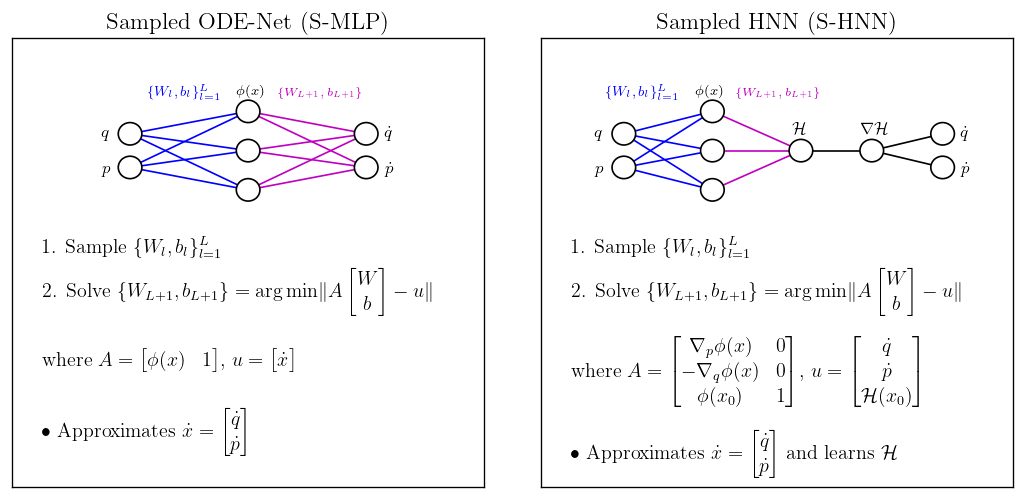

In [6]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(9,7*golden_ratio), dpi=120)

draw_ode_net(ax1, start=(-1.0, 1))
ax1.text(-1.75, 0.15, rf'1. Sample {HIDDEN_WEIGHTS}', ha="left", va="center", fontsize="medium")
ax1.text(-1.75, -0.25, rf'2. Solve {LSTSQ}', ha="left", va="center", fontsize="medium")
ax1.text(-1.75, -0.9, rf'where {A_matrix}, {u_vector}')
BULLET_POINT = '•'
ax1.text(-1.75, -1.5, rf"{BULLET_POINT} Approximates {APPROX_MLP}", ha="left", va="center", fontsize="medium")

ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_xticks([])
ax1.set_yticks([])
#ax1.grid()



ax1.set_title("Sampled ODE-Net (S-MLP)")

# initial approximation (ELM or U-SWIM)
#ax2.text(0, 1.5, r"$\widehat{\mathcal{H}}(q,p) = W_{L+1} \Phi^{(L)}(q,p) + b_{L+1}$", ha="center", va="center")
draw_hnn(ax2, start=(-1.3, 1))          
ax2.text(-1.75, 0.15, rf'1. Sample {HIDDEN_WEIGHTS}', ha="left", va="center", fontsize="medium")
ax2.text(-1.75, -0.25, rf'2. Solve {LSTSQ}', ha="left", va="center", fontsize="medium")
ax2.text(-1.75, -1, rf'where {A_matrix_hnn}, {u_vector_hnn}')
BULLET_POINT = '•'
HAMIL = r"$\mathcal{H}$"
ax2.text(-1.75, -1.7, rf"{BULLET_POINT} Approximates {APPROX_MLP} and learns {HAMIL}", ha="left", va="center", fontsize="medium")

ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_xticks([])
ax2.set_yticks([])
#ax2.grid()
ax2.set_title("Sampled HNN (S-HNN)")


fig.tight_layout()
fig.savefig("assets/smlp-shnn.png")